<a href="https://colab.research.google.com/github/mwoodward1990/colab-notebooks-general-collection/blob/main/Bollinger_Band_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses the Bollinger Band strategy to determine when to buy and sell stock

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# load the data
from google.colab import files
files.upload()

Saving AAPL.csv to AAPL (1).csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700\n2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200\n2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800\n2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900\n2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600\n2014-11-03,108.220001,110.300003,107.720001,109.010002,102.328766,199952900\n2014-11-10,109.019997,114.190002,108.400002,114.180000,107.646675,205166700\n2014-11-17,114.269997,117.570000,113.300003,116.470001,109.805626,233414700\n2014-11-24,116.849998,119.750000,116.620003,118.930000,112.124863,181873900\n2014-12-01,118.809998,119.250000,111.269997,115.000000,108.419746,266589700\n2014-12-08,114.099998,114.849998,109.349998,109.730003,103.451294,259868000\n2014-12-15,110.699997,113.239998,106.260002,111.779999,105.383980,328856600\n2014-12-22,112.160004,114.5199

In [ ]:
# get the data
df = pd.read_csv('AAPL.csv')
# set the index to be the date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


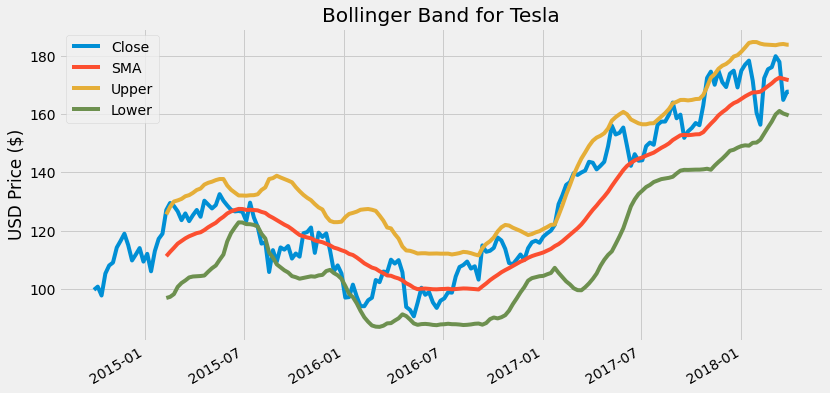

In [ ]:
# Calculate the simple moving average, standard deviation, upper band and the lower band
# Get the time period (20 day)
period = 20
# Calculate the Simple Moving Average (SMA)
df['SMA'] = df['Close'].rolling(window=period).mean()
# get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std()
# calculate the upper Bollinger band
df['Upper'] = df['SMA'] + (df['STD'] * 2)
# calculate the lower Bollinger band
df['Lower'] = df['SMA'] - (df['STD'] * 2)

# Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']
# plot the data
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Bollinger Band for Tesla')
plt.ylabel('USD Price ($)')
plt.show()

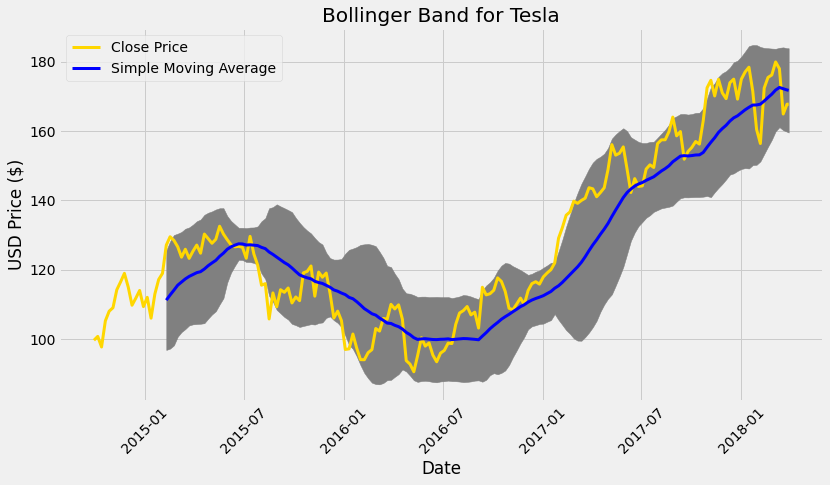

In [ ]:
# plot and shade the area between the two Bollinger bands
# get the figure and the figure size
fig = plt.figure(figsize=(12.2, 6.4))
# add the subplot
ax = fig.add_subplot(1, 1, 1)
# get the index values of the data frame
x_axis = df.index
# plot and shade the area between the upper band and the lower band grey
ax.fill_between(x_axis, df['Upper'], df['Lower'], color = 'grey')
# plot the closing price and the average
ax.plot(x_axis, df['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, df['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average')
# set the title and show
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [ ]:
# create a new data frame 
new_df = df[period-1:]
# show the new data
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
2015-02-09,2015-02-09,118.550003,127.480003,118.430000,127.080002,120.281372,303206800,111.190501,7.184101,125.558704,96.822298
2015-02-16,2015-02-16,127.489998,129.500000,126.919998,129.500000,122.571915,194354900,112.684501,7.736909,128.158319,97.210682
2015-02-23,2015-02-23,130.020004,133.600006,126.610001,128.460007,121.587555,368216200,114.071001,7.963220,129.997440,98.144562
2015-03-02,2015-03-02,129.250000,130.279999,125.760002,126.599998,119.827042,246938500,115.517501,7.437388,130.392277,100.642725
2015-03-09,2015-03-09,127.959999,129.570007,121.629997,123.589996,116.978073,326514100,116.436001,7.230178,130.896356,101.975645
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,171.852999,5.954844,183.762687,159.943312
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,172.601499,5.726564,184.054628,161.148370
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,172.223499,5.977624,184.178748,160.268251
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,171.878999,6.027540,183.934080,159.823919


In [ ]:
# create a function to get the buy and sell signals
def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]: # then you should sell
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['Lower'][i]: # then you should buy
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
      
  return (buy_signal, sell_signal)

In [ ]:
# create two new columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


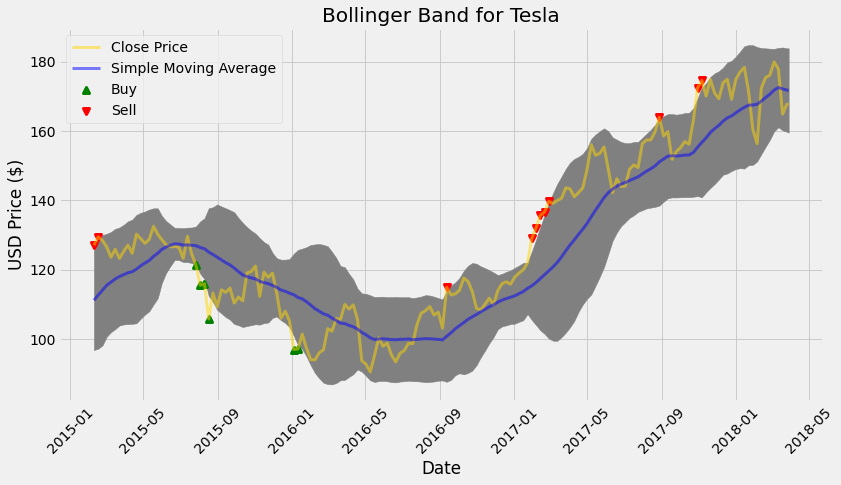

In [ ]:
# plot all of the data
# get the figure and the figure size
fig = plt.figure(figsize=(12.2, 6.4))
# add the subplot
ax = fig.add_subplot(1, 1, 1)
# get the index values of the data frame
x_axis = new_df.index
# plot and shade the area between the upper band and the lower band grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color = 'grey')
# plot the closing price and the average
ax.plot(x_axis, new_df['Close'], color = 'gold', lw = 3, label = 'Close Price', alpha = 0.5)
ax.plot(x_axis, new_df['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average', alpha = 0.5 )
ax.scatter(x_axis, new_df['Buy'], color = 'green', lw=3, label='Buy', marker = '^', alpha = 1)
ax.scatter(x_axis, new_df['Sell'], color = 'red', lw=3, label='Sell', marker = 'v', alpha = 1)
# set the title and show
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()